# **2440078411_AlvonDaniloSukardi_LB01_UAS**

## **1a. Terdapat praproses data yang tepat untuk menyelesaikan problem di atas**

### **Import libraries and dataset**

Pertama - tama adalah mengimport library yang dibutuhkan seperti pandas untuk data preprocessing, numpy untuk mathematical computation, matplotlib dan seaborn untuk plotting data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Kemudian mengimport dan menginput dataset ke dalam variabel dengan menggunakan bantuan pandas serta memunculkan 5 data pertama untuk memastikan data sudah terimport dengan benar beserta nama kolom yang ada

In [ ]:
df = pd.read_csv('/content/knn_datasets.csv')

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,3,126,88.0,41,235,39.3,0.704,27,0
1,8,99,84.0,0,0,35.4,0.388,50,0
2,7,196,90.0,0,0,39.8,0.451,41,1
3,9,119,80.0,35,0,29.0,0.263,29,1
4,11,143,94.0,33,146,36.6,0.254,51,1


### **Get summary statistics of feature columns**

Kemudian program akan mengecek untuk hasil statistik dari tiap kolom fitur. Terdapat 3 poin yang saya dapat dari tabel ini:
1. Jika nilai std < mean maka kolom tersebut bisa dikatakan kurang bervariasi datanya, jadi semua kolom kecuali kolom X5 mempunyai data yang kurang bervariasi sehingga datanya berkumpul di sekitar nilai mean. 
2. Ada juga nilai maximum yang memiliki rentang sangat jauh dari mean seperti pada kasus kolom X5 (max: 744, mean: 79.1) maka terdapat outlier pada kolom tersebut. 
3. Terakhir, pada kasus kolom X2, nilai minimum nya sangat jauh dari meannya yang menandakan terdapat data outlier juga pada kolom ini.

In [ ]:
df.iloc[:, :-1].describe()

,X1,X2,X3,X4,X5,X6,X7,X8
count,480.000000,480.000000,479.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,3.779167,121.087500,69.033403,20.714583,79.135417,32.022083,0.485019,32.916667
std,3.335327,32.312033,19.100344,15.632784,114.186313,8.145896,0.337495,11.606336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.075000,0.254000,24.000000
50%,3.000000,117.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000
75%,6.000000,142.000000,80.000000,33.000000,122.750000,36.600000,0.645500,39.000000
max,17.000000,197.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


### **Handling missing values**

Pertama program akan menampilkan informasi terkait dataframe yang ada. Bisa berupa range index atau banyak baris yang ada, total kolom yang ada, tipe data dari tiap kolom beserta jumlah baris yang memiliki value non null (tidak kosong), dan lain sebagainya.

Data juga perlu dicek apakah terdapat missing values atau tidak. Jika ada maka perlu ditangani agar tidak menurunkan akurasi model nantinya. Namun pada kasus ini, bisa dilihat bahwa hanya ada 1 value yang kosong dan hanya pada 1 kolom saja, yaitu kolom X3.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      480 non-null    int64  
 1   X2      480 non-null    int64  
 2   X3      479 non-null    float64
 3   X4      480 non-null    int64  
 4   X5      480 non-null    int64  
 5   X6      480 non-null    float64
 6   X7      480 non-null    float64
 7   X8      480 non-null    int64  
 8   X9      480 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 33.9 KB


In [ ]:
print('Jumlah missing value:')
df.isna().sum()

Jumlah missing value:


X1    0
X2    0
X3    1
X4    0
X5    0
X6    0
X7    0
X8    0
X9    0
dtype: int64

Kemudian, data yang kosong akan dihandle dengan mengganti nilai mean dari kolom X3 serta memastikan kembali apakah tiap kolom sudah terisi semua atau belum (terbukti sudah terisi semua dengan jumlah missing value 0 pada semua kolom)

In [ ]:
df['X3'].fillna(df['X3'].mean(), inplace=True)

In [ ]:
print('Missing value setelah diisi dengan mean:')
df.isna().sum()

Missing value setelah diisi dengan mean:


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
X9    0
dtype: int64

### **Handling outliers**

Program akan menampilkan boxplot untuk setiap kolom yang ada dan dapat dilihat bahwa insight yang saya jelaskan pada statistic summary benar" sesuai plot yang ada di bawah ini.

Pada tahapan ini nilai outliers yang ada akan dihandle dengan menggunakan metode IQR (Inter Quantile Range) untuk mendeteksi outliers. Kemudian, mengganti nilai outliers dengan mean dari kolom tersebut

Referensi: https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

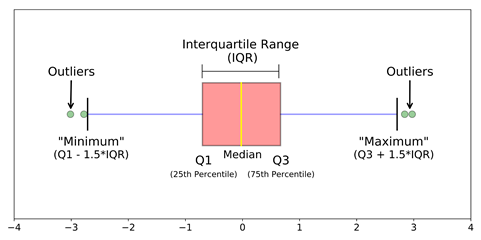

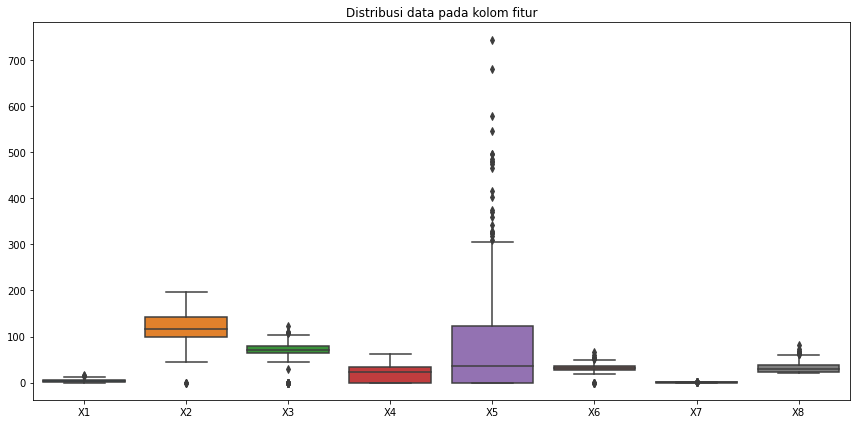

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1])

plt.title('Distribusi data pada kolom fitur')
plt.tight_layout()
plt.show()

Fungsi untuk menangani nilai outliers. Pendeteksian outliers ditemukan jika nilai suatu data > batas atas (upper) dan nilai suatu data < batas bawah (lower). Jika demikian, maka nilai tersebut akan diubah ke nilai mean dari kolom itu sendiri

In [ ]:
def handle_outliers_IQR(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3 - q1
  upper = df[~(df>(q3 + 1.5 * IQR))].max()
  lower = df[~(df<(q1 - 1.5 * IQR))].min()
  df = np.where(df > upper,
                  df.mean(),
                  np.where(
                      df < lower,
                      df.mean(),
                      df
                  )
                )
  return df

In [ ]:
final_df = pd.DataFrame()
for i in df.columns:
  final_df[i] = handle_outliers_IQR(df[i])

Setelah outliers dihandle, dapat dilihat bahwa:
1. Nilai maximum pada kolom X5 sudah menjadi 304 (dari 744)
2. Nilai minimum pada kolom X2 sudah diubah menjadi 44 (dari 0)

Selain itu, pada boxplot dari data yang sudah dihandle dapat dilihat bahwa titik - titik outliers beberapa sudah dihandle (walaupun tidak semua agar data tetap bervariasi). Hal ini menandakan bahwa outliers pada tiap kolom sudah dihandle

In [ ]:
print('Feature summary statistc setelah outliers ditangani:')
final_df.describe()

Feature summary statistc setelah outliers ditangani:


,X1,X2,X3,X4,X5,X6,X7,X8,X9
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,3.685660,122.096562,71.835351,20.714583,61.854405,32.138977,0.448492,31.870313,0.352083
std,3.170442,30.341510,10.720516,15.632784,76.539388,6.523623,0.255911,9.889845,0.478118
min,0.000000,44.000000,44.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.400000,0.254000,24.000000,0.000000
50%,3.000000,118.000000,70.000000,23.000000,36.500000,32.022083,0.384000,29.000000,0.000000
75%,6.000000,142.000000,78.000000,33.000000,105.000000,36.125000,0.597750,38.000000,1.000000
max,13.000000,197.000000,104.000000,63.000000,304.000000,50.000000,1.224000,61.000000,1.000000


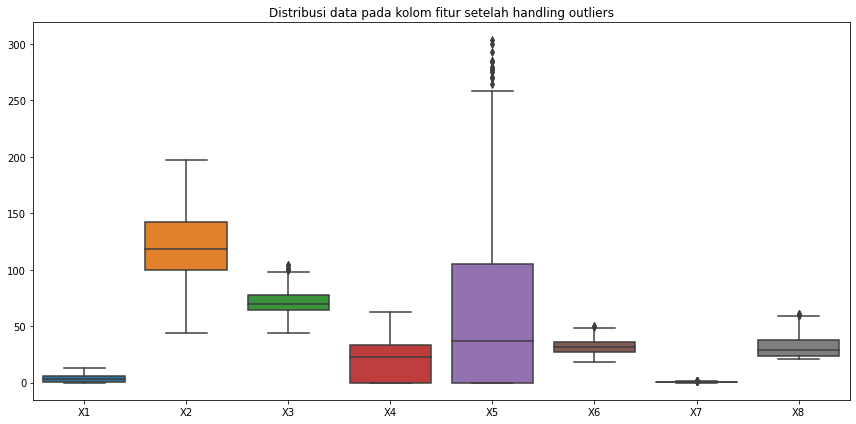

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_df.iloc[:, :-1])

plt.title('Distribusi data pada kolom fitur setelah handling outliers')
plt.tight_layout()
plt.show()

### **Get label insights**

Dari plot ini dapat disimpulkan bahwa dari semua data pada kolom label (X9), kebanyakan bernilai 0 sehingga probability munculnya nilai ini pasti jauh lebih tinggi daripada 1. Bisa dilihat juga pada tabel summary statistic dengan nilai Q1 dan Q2 adalah sama yaitu 0 dan Q3 adalah 1 yang menandakan sebanyak 75% data pada kolom X9 bernilai 0 dan 25% sisanya bernilai 1

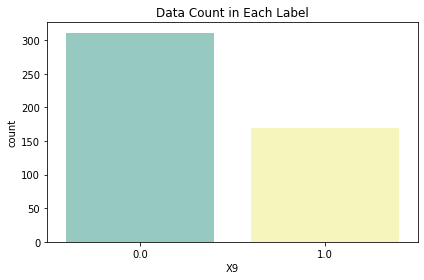

In [ ]:
sns.countplot(data=final_df, x=final_df['X9'], palette="Set3")

plt.title('Data Count in Each Label')
plt.tight_layout()
plt.show()

In [ ]:
final_df['X9'].describe()

count    480.000000
mean       0.352083
std        0.478118
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: X9, dtype: float64

### **Select independent and dependent data**

Seleksi independen dan dependen variabel juga perlu dilakukan untuk proses traning model. Untuk X adalah independen karena dia bisa berdiri sendiri, sedangkan y adalah dependen karena nilainya bergantung pada variabel X. Untuk sementara, X akan menyimpan semua kolom kecuali label (X9), dan y akan menyimpan semua nilai pada kolom X9

In [ ]:
X = final_df.iloc[:, :-1]
y = final_df.iloc[:, -1]

In [ ]:
X

,X1,X2,X3,X4,X5,X6,X7,X8
0,3.0,126.0,88.0,41.0,235.0,39.3,0.704,27.000000
1,8.0,99.0,84.0,0.0,0.0,35.4,0.388,50.000000
2,7.0,196.0,90.0,0.0,0.0,39.8,0.451,41.000000
3,9.0,119.0,80.0,35.0,0.0,29.0,0.263,29.000000
4,11.0,143.0,94.0,33.0,146.0,36.6,0.254,51.000000
...,...,...,...,...,...,...,...,...
475,6.0,166.0,74.0,0.0,0.0,26.6,0.304,32.916667
476,5.0,110.0,68.0,0.0,0.0,26.0,0.292,30.000000
477,2.0,81.0,72.0,15.0,76.0,30.1,0.547,25.000000
478,7.0,195.0,70.0,33.0,145.0,25.1,0.163,55.000000


In [ ]:
y

0      0.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
475    0.0
476    0.0
477    0.0
478    1.0
479    0.0
Name: X9, Length: 480, dtype: float64

### **Features scalling**

Pada variabel dependen (X) perlu dilakukan normalisasi data karena range nilai antar kolomnya sangat berjauhan. Hal ini dapat menurunkan peforma model nantinya. Normalisasi akan dilakukan dengan metode z_score atau StandardScaler() pada scikit-learn.

Data akan ditransform dengan nilai mean 0 dan standard deviation 1. Selain itu, nilai akan terdistribusi mulai dari -3.00 hingga 3.00 jika distribusi data pada kolom tersebut normal

In [ ]:
def z_score(df):
  df_std = df.copy()
  for column in df_std.columns:
    df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
  return df_std

X = z_score(X)

In [ ]:
X

,X1,X2,X3,X4,X5,X6,X7,X8
0,-0.216266,0.128650,1.507824,1.297620,2.262176,1.097706,0.998425,-0.492456
1,1.360801,-0.761220,1.134707,-1.325073,-0.808138,0.499879,-0.236380,1.833162
2,1.045387,2.435721,1.694382,-1.325073,-0.808138,1.174351,0.009799,0.923138
3,1.676214,-0.102057,0.761591,0.913811,-0.808138,-0.481171,-0.724832,-0.290228
4,2.307041,0.688939,2.067498,0.785875,1.099376,0.683826,-0.760000,1.934276
...,...,...,...,...,...,...,...,...
475,0.729974,1.446976,0.201916,-1.325073,-0.808138,-0.849065,-0.564620,0.105801
476,0.414561,-0.398680,-0.357758,-1.325073,-0.808138,-0.941038,-0.611511,-0.189114
477,-0.531680,-1.354467,0.015358,-0.365551,0.184815,-0.312553,0.384930,-0.694684
478,1.045387,2.402762,-0.171200,0.785875,1.086311,-1.078998,-1.115593,2.338731


## **1b. Untuk mempercepat proses komputasi, silahkan diprogram anda harus ada algoritma yang memilih attributes yang memiliki korelasi tinggi terhadap target (X9)**

Dari heatmap di bawah ini dapat disimpulkan bahwa fitur yang memiliki nilai korelasi tinggi dengan label (X9) adalah kolom X1, X2, X6, dan X8. Namun, dapat dilihat juga bahwa nilai korelasi antar X1 dan X8 bisa dibilang tinggi (0.62). Jadi untuk menghindari terjadinya multicollinearity yang menyebabkan penurunan peforma model, maka kolom X1 atau X8 perlu dihilangkan salah satunya. 

Dari analisa saya, maka kolom yang perlu dihilangkan adalah X8. Walaupun korelasi dengan kolom labelnya lebih tinggi daripada X1, tetapi korelasi X8 dengan X2 dan X6 masih jauh lebih tinggi daripada korelasi X1 dengan X2 dan X6 sehingga saya lebih memilih menghilangkan kolom X8 untuk menghindari terjadinya multicollinearity

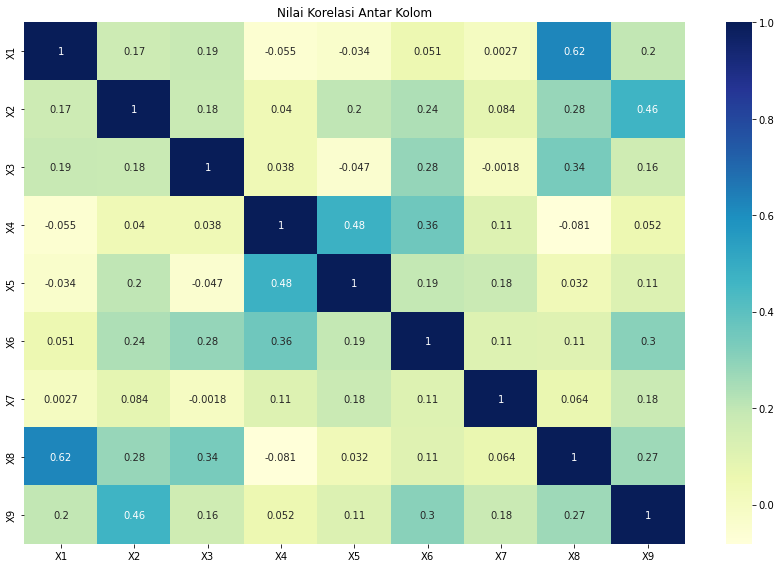

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_df.corr(), annot=True, cmap='YlGnBu')

plt.title('Nilai Korelasi Antar Kolom')
plt.tight_layout()
plt.show()

In [ ]:
X = X.drop(['X3', 'X4', 'X5', 'X7', 'X8'], axis=1)

In [ ]:
X

,X1,X2,X6
0,-0.216266,0.128650,1.097706
1,1.360801,-0.761220,0.499879
2,1.045387,2.435721,1.174351
3,1.676214,-0.102057,-0.481171
4,2.307041,0.688939,0.683826
...,...,...,...
475,0.729974,1.446976,-0.849065
476,0.414561,-0.398680,-0.941038
477,-0.531680,-1.354467,-0.312553
478,1.045387,2.402762,-1.078998


## **1c. Pisahkan data menjadi training dan testing dengan perbandingan 75% data training**

Training set terbagi menjadi X_train (independen) dan y_train (dependen). Begitu juga dengan testing set (X_test dan y_test). Training set digunakan untuk melatih model dengan data sehingga diperlukan persentase pembagian yang lebih tinggi agar model tidak underfitting. Sedangkan testing set digunakan untuk menilai model yang sudah dilatih dengan data yang belum pernah dilihat sebelumnya saat proses training.

Data (X dan y) akan dibagi dengan perbandingan 3:1 atau 75% untuk training set dan 25% sisanya untuk testing set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train

,X1,X2,X6
442,1.360801,-1.585174,0.484550
434,-0.531680,-0.728262,0.867773
397,0.099147,0.721897,0.975075
159,0.414561,0.260483,1.067049
157,-1.162506,0.227525,-0.017919
...,...,...,...
323,0.414561,-0.003183,0.392577
192,1.045387,1.875432,0.315932
117,-1.162506,-0.958969,-0.527158
47,-0.531680,-0.431638,1.618889


In [ ]:
y_train

442    0.0
434    0.0
397    1.0
159    1.0
157    1.0
      ... 
323    0.0
192    0.0
117    0.0
47     0.0
172    1.0
Name: X9, Length: 360, dtype: float64

In [ ]:
X_test

,X1,X2,X6
15,0.099147,-0.629387,-1.247616
124,0.099147,1.051478,0.101328
141,1.045387,-0.662346,0.775799
263,1.045387,1.282185,-0.266566
170,-0.216266,-0.365722,-1.462221
...,...,...,...
463,-1.162506,-1.255592,0.929088
198,0.414561,-1.222634,-0.481171
155,1.360801,1.875432,0.085999
221,0.099147,-1.024885,0.147314


In [ ]:
y_test

15     0.0
124    0.0
141    0.0
263    1.0
170    0.0
      ... 
463    0.0
198    1.0
155    1.0
221    0.0
450    0.0
Name: X9, Length: 120, dtype: float64

## **1d. Tentukan nilai k-optimal menggunakan elbow method (number of k values VS error/accuracy)**

Pertama adalah menginisialisasi fungsi - fungsi yang perlu digunakan dalam melakukan algoritma KNN from scratch. 
1. euclideanDistance() digunakan untuk mencari jarak antara 2 titik atau variabel. 
2. getNeighbors() digunakan untuk mencari neighbors di sekitar titik dengan euclidean distance. Kemudian mencari nilai neighbors terdekat. 
3. getResponse() untuk mendapatkan hasil prediksi pada suatu nilai tertentu dengan melakukan vote. 
4. Terakhir, getAccuracy() untuk menghitung akurasi suatu model dengan membandingkan nilai prediksi dengan nilai aktualnya

In [ ]:
import math
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

import operator 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]: 
			correct = correct + 1
			
	return (correct/float(len(testSet))*100)  

Membuat dataframe training set dan testing set dengan menggabungkan nilai pada independen variabelnya (X_train dan X_test) dengan nilai pada dependen variabelnya (y_train dan y_test)

In [ ]:
trainingSet = X_train
trainingSet['X9'] = y_train
trainingSet = np.array(trainingSet)

In [ ]:
testSet = X_test
testSet['X9'] = y_test
testSet = np.array(testSet)

Menampilkan semua nilai akurasi dari nilai k = 1 hingga k = 50. Bisa dilihat bahwa nilai akurasi akan menaik hingga nilai k = 23 dan stabil serta menurun setelahnya

In [ ]:
accuracies=[]
K = np.arange(50) + 1
i = 0

for k in range(1, 51):
  predictions=[]
  for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
  accuracy = getAccuracy(testSet, predictions)
  accuracies.append(accuracy)
  print('Accuracy k = ' + str(k) + ' is ' + repr(accuracy) + '%')

Accuracy k = 1 is 66.66666666666666%
Accuracy k = 2 is 66.66666666666666%
Accuracy k = 3 is 71.66666666666667%
Accuracy k = 4 is 69.16666666666667%
Accuracy k = 5 is 69.16666666666667%
Accuracy k = 6 is 71.66666666666667%
Accuracy k = 7 is 74.16666666666667%
Accuracy k = 8 is 74.16666666666667%
Accuracy k = 9 is 73.33333333333333%
Accuracy k = 10 is 75.0%
Accuracy k = 11 is 75.0%
Accuracy k = 12 is 75.0%
Accuracy k = 13 is 74.16666666666667%
Accuracy k = 14 is 72.5%
Accuracy k = 15 is 71.66666666666667%
Accuracy k = 16 is 71.66666666666667%
Accuracy k = 17 is 74.16666666666667%
Accuracy k = 18 is 77.5%
Accuracy k = 19 is 75.83333333333333%
Accuracy k = 20 is 77.5%
Accuracy k = 21 is 77.5%
Accuracy k = 22 is 77.5%
Accuracy k = 23 is 78.33333333333333%
Accuracy k = 24 is 77.5%
Accuracy k = 25 is 76.66666666666667%
Accuracy k = 26 is 76.66666666666667%
Accuracy k = 27 is 77.5%
Accuracy k = 28 is 78.33333333333333%
Accuracy k = 29 is 77.5%
Accuracy k = 30 is 77.5%
Accuracy k = 31 is 76.666

Membuat dataframe baru untuk menyimpan nilai k dan akurasinya. Kemudian menampilkan line chart (elbow method) untuk melihat perbandingan antara nilai k dan akurasinya dengan lebih jelas

In [ ]:
accuracy_df = pd.DataFrame()
accuracy_df['K'] = K
accuracy_df['Accuracy'] = accuracies
accuracy_df.head()

,K,Accuracy
0,1,66.666667
1,2,66.666667
2,3,71.666667
3,4,69.166667
4,5,69.166667


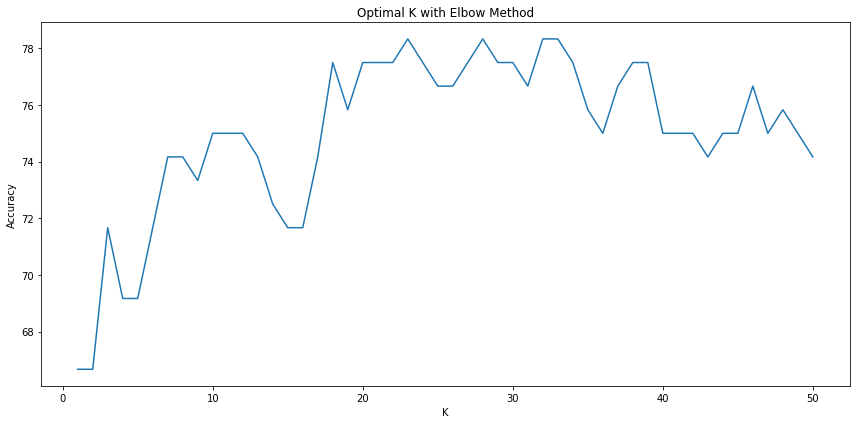

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=accuracy_df, x=accuracy_df['K'], y=accuracy_df['Accuracy'], markers=True)

plt.title('Optimal K with Elbow Method')
plt.tight_layout()
plt.show()

In [ ]:
max_k = np.argmax(accuracies) + 1
print('Akurasi maksimum didapat pada nilai k = ' + str(max_k) + ' dengan akurasi ' + str(accuracy_df['Accuracy'].max()))

Akurasi maksimum didapat pada nilai k = 23 dengan akurasi 78.33333333333333


## **1e. Evaluasi model KNN menggunakan accuracy, precision, dan recall**

Membuat fungsi tp_fp_tn_fn() untuk mendapatkan nilai:
1. True Positive: Saat nilai prediksi dan aktualnya sama dengan 1
2. False Positive: Saat nilai prediksi sama dengan 1 tetapi nilai aktualnya sama dengan 0
3. True Negative: Saat nilai prediksi dan aktualnya sama dengan 0
4. False Negative: Saat nilai prediksi sama dengan 0 tetapi nilai aktualnya sama dengan 1

In [ ]:
def tp_fp_tn_fn(y_real, y_pred):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for x in range(len(y_real)):
        if ((y_real[x][-1] == 1) and (y_pred[x] == 1)):
            tp += 1
        elif ((y_real[x][-1] == 0) and (y_pred[x] == 1)):
            fp += 1
        elif ((y_real[x][-1] == 0) and (y_pred[x] == 0)):
            tn += 1
        elif ((y_real[x][-1] == 1) and (y_pred[x] == 0)):
            fn += 1

    return tp, fp, tn, fn

Membuat fungsi:
1. count_acc() untuk mendapatkan nilai akurasi (%)
2. count_prec() untuk mendapatkan nilai precision (%)
3. count_rec() untuk mendapatkan nilai recall (%)

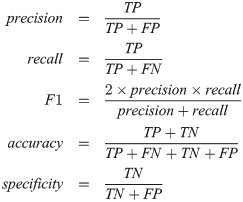

In [ ]:
def count_acc(tp, fp, tn, fn):
  return ((tp + tn) / (tp + fp + tn + fn) * 100)

def count_prec(tp, fp):
  return ((tp / (tp + fp)) * 100)

def count_rec(tp, fn):
  return ((tp / (tp + fn)) * 100)

Mendapatkan nilai prediksi dengan menjalankan algoritma KNN menggunakan k terbaik, yaitu 23. Kemudian mendapatkan dan menampilkan nilai True Positive, False Positive, True Negative, dan False Negative

In [ ]:
predictions=[]

for x in range(len(testSet)):
  neighbors = getNeighbors(trainingSet, testSet[x], 23)
  result = getResponse(neighbors)
  predictions.append(result)

In [ ]:
tp, fp, tn, fn = tp_fp_tn_fn(testSet, predictions)

print('True Positive: ' + str(tp))
print('False Positive: ' + str(fp))
print('True Negative: ' + str(tn))
print('False Negative: ' + str(fn))

True Positive: 26
False Positive: 10
True Negative: 68
False Negative: 16


Menghitung nilai akurasi, precision, dan recall dari fungsi yang sudah didefinisikan. Dari nilai 3 metrik ini dapat disimpulkan bahwa model yang dibuat sudah baik:
1. Accuracy 78% menandakan bahwa model dapat memprediksi 78% data dengan benar (TP dan TN) dari keseluruhan data yang ada
2. Precision 72% menandakan bahwa model dapat memprediksi 72% data benar positif dari keseluruhan data yang diprediksi benar positif
3. Recall 62% menandakan bahwa model dapat memprediksi 62% data benar positif dibandingkan seluruh data yang benar positif. Walaupun recall hanya sebesar 62%, tetapi hal yang perlu diingat kembali adalah persebaran class 0 dan 1 dimana label bernilai 0 jauh lebih banyak dibanding jumlah label bernilai 1 (3:1), hal ini dapat mempengaruhi nilai dari recall itu sendiri yang hanya menghitung nilai class 1

In [ ]:
accuracy = count_acc(tp, fp, tn, fn)
precision = count_prec(tp, fp)
recall = count_rec(tp, fn)

print('Accuracy: ' + str(accuracy) + '%')
print('Precision: ' + str(precision) + '%')
print('Recall: ' + str(recall) + '%')

Accuracy: 78.33333333333333%
Precision: 72.22222222222221%
Recall: 61.904761904761905%


## **1f. Buatlah confusion matrix**

Membuat confussion matrix dengan membuat numpy array dengan format:

|TN    FP|

|FN    TP|

In [ ]:
confussion_matrix = []
confussion_matrix.append([tn, fp])
confussion_matrix.append([fn, tp])
confussion_matrix = np.array(confussion_matrix)
confussion_matrix

array([[68, 10],
       [16, 26]])

Plotting confussion matrix dengan menggunakan heatmap

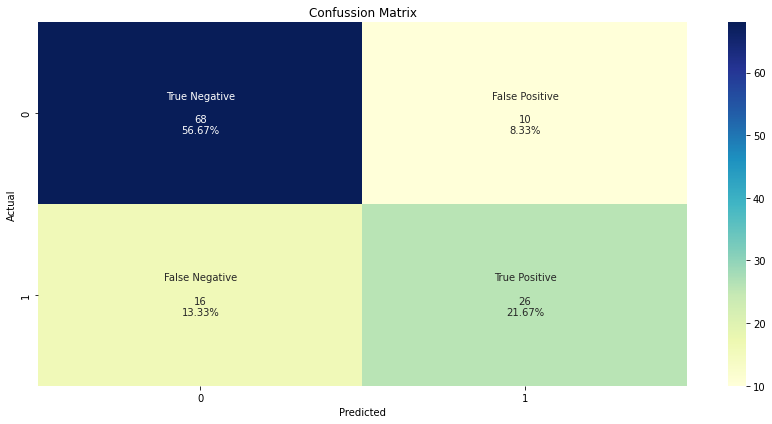

In [ ]:
plt.figure(figsize=(12, 6))
group_names = ['True Negative\n','False Positive\n','False Negative\n','True Positive\n']
group_counts = ['{0:0.0f}'.format(value) for value in
                confussion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confussion_matrix.flatten()/np.sum(confussion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(confussion_matrix, annot=labels, fmt='', cmap='YlGnBu')

plt.title('Confussion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

## **2. Algoritma:**
## **a. Tentukan nilai k**
## **b. Pilih centroid secara acak**
##**c. Repeat:**
##**Expectation: Cocokan setiap titik dengan centroid terdekatnya**
##**Maximization: Hitung centroid baru (mean) dari setiap cluster**
##**d. Until posisi centroid tidak berubah**

Pertama - tama mengimport dan menginput dataset ke dalam variabel dengan menggunakan bantuan pandas serta memunculkan 5 data pertama untuk memastikan data sudah terimport dengan benar beserta nama kolom yang ada

In [ ]:
df2 = pd.read_csv('/content/DNA.csv')

df2.head()

,num_of_atoms,num_of_heavy_atoms
0,14,6
1,11,5
2,15,6
3,21,7
4,20,7


Fungsi mengambil k (jumlah centroid) titik data secara acak dari dataset X (array titik dataset), lalu titik dihapus dan diganti dengan titik yang baru.

Jadi hasilnya akan memiliki k array poin unik. Titik yang ditemukan dapat digunakan sebagai centroid awal untuk algoritma k-means

In [ ]:
import random

def get_initial_centroids(X, k):
    number_of_samples = X.shape[0]
    sample_points_ids = random.sample(range(0, number_of_samples), k)

    centroids = [tuple(X[id]) for id in sample_points_ids]
    unique_centroids = list(set(centroids))

    number_of_unique_centroids = len(unique_centroids)

    while number_of_unique_centroids < k:
        new_sample_points_ids = random.sample(range(0, number_of_samples), k - number_of_unique_centroids)
        new_centroids = [tuple(X[id]) for id in new_sample_points_ids]
        unique_centroids = list(set(unique_centroids + new_centroids))

        number_of_unique_centroids = len(unique_centroids)

    return np.array(unique_centroids)

Fungsi menghitung jarak euclidean antara matriks A dan B. Euclidean distance dapat dicari dengan mengakar kuadratkan penjumlahan antara selisih kuadrat titik satu dengan titik lainnya.

Contoh: C[2,15] adalah jarak antara titik 2 dari matriks A (A[2]) dan titik 15 dari matriks B (B[15])

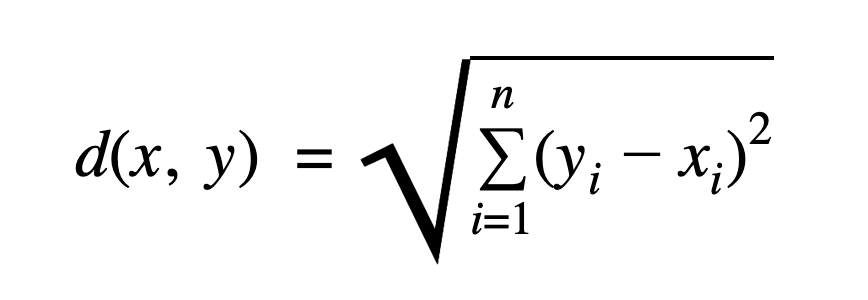

In [ ]:
def get_euclidean_distance(A_matrix, B_matrix):
    A_square = np.reshape(np.sum(A_matrix * A_matrix, axis=1), (A_matrix.shape[0], 1))
    B_square = np.reshape(np.sum(B_matrix * B_matrix, axis=1), (1, B_matrix.shape[0]))
    AB = A_matrix @ B_matrix.T

    C = -2 * AB + B_square + A_square

    return np.sqrt(C)

Fungsi untuk menemukan k centroid serta menetapkan masing-masing N titik array dari X ke satu centroid

In [ ]:
def get_clusters(X, centroids, distance_mesuring_method):
    k = centroids.shape[0]

    clusters = {}

    distance_matrix = distance_mesuring_method(X, centroids)

    closest_cluster_ids = np.argmin(distance_matrix, axis=1)

    for i in range(k):
        clusters[i] = []

    for i, cluster_id in enumerate(closest_cluster_ids):
        clusters[cluster_id].append(X[i])

    return clusters

Fungsi memeriksa apakah ada centroid yang bergerak lebih dari threshold yang sudah ditetapkan (0.1). Jika tidak, maka dianggap centroid telah ditemukan

In [ ]:
def has_centroids_covered(previous_centroids, new_centroids, distance_mesuring_method, movement_threshold_delta):
    distances_between_old_and_new_centroids = distance_mesuring_method(previous_centroids, new_centroids)
    centroids_covered = np.max(distances_between_old_and_new_centroids.diagonal()) <= movement_threshold_delta

    return centroids_covered

Fungsi yang menjalankan algoritma k-means clustering dengan langkah - langkah yang sudah ditulis pada komen dari program

In [ ]:
def perform_k_means_algorithm(X, k, distance_mesuring_method, movement_threshold_delta=0):
  
    # menentukan nilai centroid awal
    new_centroids = get_initial_centroids(X=X, k=k)

    centroids_covered = False

    # ulangi hingga centroid tidak berubah
    while not centroids_covered:
        previous_centroids = new_centroids

        # mencocokan tiap titik dengan centroid terdekatnya
        clusters = get_clusters(X, previous_centroids, distance_mesuring_method)

        # menghitung centroid baru
        new_centroids = np.array([np.mean(clusters[key], axis=0, dtype=X.dtype) for key in sorted(clusters.keys())])

        centroids_covered = has_centroids_covered(previous_centroids, new_centroids, distance_mesuring_method, movement_threshold_delta)

    return new_centroids

Fungsi kuadrat dari euclidean distance yang akan digunakan untuk mencari nilai inersia dari algoritma k-means untuk cluster tertentu

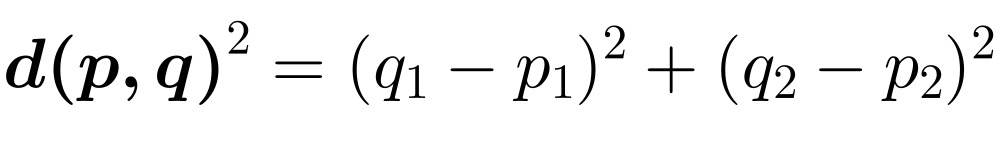

In [ ]:
def get_distance(a, b):
  one = (a[0] - b[0]) ** 2
  two = (a[1] - b[1]) ** 2
  distance = one + two
  return distance

Mencari nilai inersia dengan menjumlahkan setiap kuadrat euclidean distance dari cluster tertentu, kemudian menginputkannya pada WCSS array untuk ditampilkan nantinya

In [ ]:
wcss = []

for k in range(1, 11):
  X = df2.values
  centroids = perform_k_means_algorithm(X, k, movement_threshold_delta=1/10, 
                                        distance_mesuring_method=get_euclidean_distance)

  clusters = get_clusters(X, centroids, get_euclidean_distance)

  inertia = 0

  for centroid, points in clusters.items():
      points = np.array(points)
      centroid = np.mean(points, axis=0)

      for point in points:
        inertia += (get_distance(point, centroid))

  wcss.append(inertia)

Membuat array k yang bernilai 1 sampai 10, mengingat banyak cluster yang dicoba juga dari 1 cluster hingga 10 cluster. Kemudian membuat dataframe yang kolomnya memuat nilai array k dan array wcss. Nilai wcss dapat berubah - ubah karena letak centroid awal dari tiap cluster dirandom

In [ ]:
K = np.arange(10) + 1
print(K)

[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
print(wcss)

[339971.2249828912, 120606.75329961725, 75233.9601412291, 44430.38073004494, 40295.24982667684, 53767.45826122429, 39457.6260860748, 21423.380231504412, 24867.561964194672, 19318.549183065705]


In [ ]:
elbow = pd.DataFrame()
elbow['K'] = K
elbow['WCSS'] = wcss
elbow.head()

,K,WCSS
0,1,339971.224983
1,2,120606.753300
2,3,75233.960141
3,4,44430.380730
4,5,40295.249827


Menampilkan line chart (elbow method) dari dataframe yang sudah dibuat. Karena titik centroid awal dirandom untuk tiap clusternya, maka line ini dapat berubah - ubah bentuknya

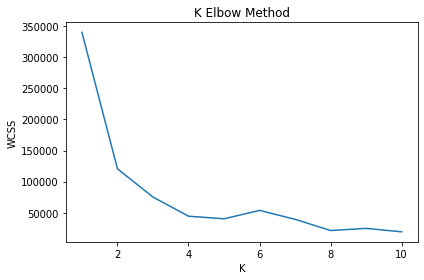

In [ ]:
sns.lineplot(data=elbow, x=elbow['K'], y=elbow['WCSS'])

plt.title('K Elbow Method')
plt.tight_layout()
plt.show()

Menampilkan scatter plot yang berisi setiap data point dan centroid dari tiap cluster. K yang digunakan adalah k = 4 karena dari elbow method sebelumnya diperoleh nilai k optimalnya adalah 4 yang didapat dari elbow point

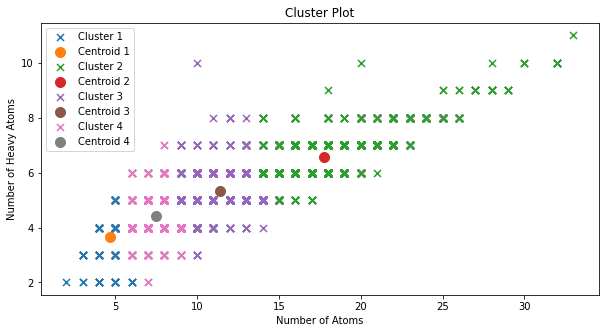

In [ ]:
k = 4
X = df2.values

centroids = perform_k_means_algorithm(X, k, movement_threshold_delta=1/10, 
                                      distance_mesuring_method=get_euclidean_distance)

clusters = get_clusters(X, centroids, get_euclidean_distance)

plt.rcParams['figure.figsize'] = [10, 5]

cluster_num = 1
centroid_num = 1

for centroid, points in clusters.items():
    points = np.array(points)
    centroid = np.mean(points, axis=0)

    plt.scatter(points[:, 0], points[:, 1], marker='x', s=50, label=f'Cluster {cluster_num}')
    cluster_num += 1
    plt.grid()
    plt.scatter(centroid[0], centroid[1], marker='o', s=100, label=f'Centroid {centroid_num}')
    centroid_num += 1

plt.title('Cluster Plot')
plt.xlabel('Number of Atoms')
plt.ylabel('Number of Heavy Atoms')
plt.legend()
plt.show()

## **3. Karena tahapan yang biasa dilakukan adalah melakukan preprocessing data terlebih dahulu maka saya akan mengerjakan mulai dari nomor 3b**
**Referensi: https://www.v7labs.com/blog/data-preprocessing-guide**
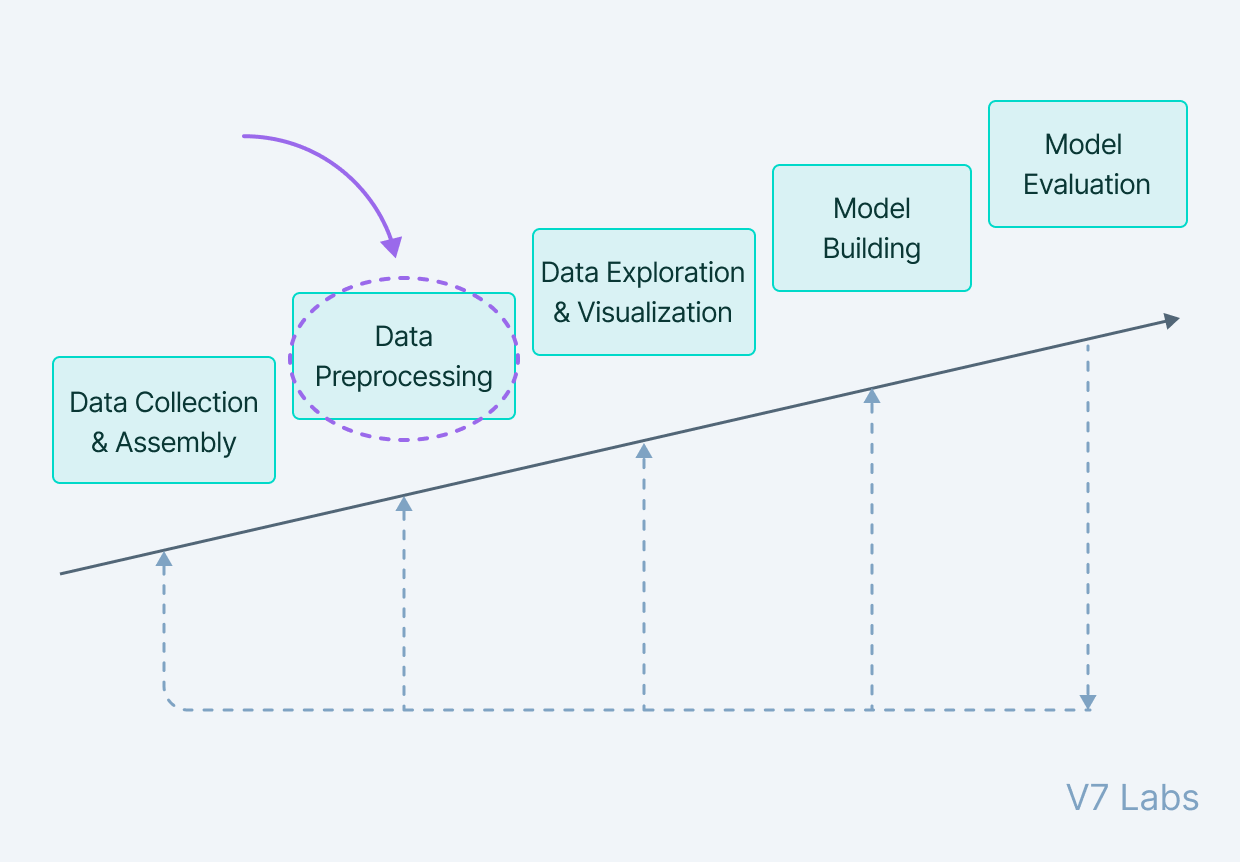

## **3b. Buatlah tahapan praproses terhadap data di atas. Tentukan apakah data tersebut membutuhkan normalisasi/standarisasi, fitur selection/dimensional reduction, atau outlier detection. Jelaskan mengenai tahapan yang kalian pilih dan berikan alasan terhadap pendekatan yang Anda lakukan**

### **Import dataset**

Pertama mengimport dan menginput dataset ke dalam variabel dengan menggunakan bantuan pandas serta memunculkan 5 data pertama untuk memastikan data sudah terimport dengan benar beserta nama kolom yang ada

In [ ]:
df3 = pd.read_csv('/content/experiment.csv')

df3.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
0,0.006711,0.0,0.013423,0.006711,0.0,0.006711,0.006711,0.020134,0.020134,0.000000,...,0.013423,0.000000,0.006711,0.013423,0.020134,0.006711,0.0,0.006711,0.0,1
1,0.000000,0.0,0.000000,0.007246,0.0,0.000000,0.000000,0.021739,0.014493,0.000000,...,0.007246,0.007246,0.000000,0.000000,0.014493,0.000000,0.0,0.007246,0.0,1
2,0.011696,0.0,0.005848,0.000000,0.0,0.005848,0.000000,0.035088,0.017544,0.017544,...,0.005848,0.000000,0.005848,0.011696,0.035088,0.005848,0.0,0.000000,0.0,1
3,0.000000,0.0,0.020833,0.000000,0.0,0.000000,0.010417,0.000000,0.020833,0.000000,...,0.010417,0.000000,0.000000,0.041667,0.000000,0.000000,0.0,0.000000,0.0,1
4,0.000000,0.0,0.034483,0.000000,0.0,0.000000,0.000000,0.000000,0.034483,0.000000,...,0.017241,0.000000,0.000000,0.068966,0.000000,0.000000,0.0,0.000000,0.0,1


Dataframe terdiri dari 4080 baris dan 201 kolom

In [ ]:
df3.shape

(4080, 201)

### **Get summary statistics**

Kemudian program akan mengecek untuk hasil statistik dari tiap kolom. Terdapat 2 poin yang saya dapat dari tabel ini:

1. Jika nilai std < mean maka kolom tersebut bisa dikatakan kurang bervariasi datanya. Kecuali kolom class, nilai std > mean yang berarti data bervariasi. Hal ini tidak mengejutkan mengingat kolom class adalah label data yang terdiri dari angka 1 - 5 saja, sedangkan fitur lainnya berisi data numerik kontinu yang tiap barisnya memiliki nilai berbeda - beda.
2. Ada juga nilai maximum yang memiliki rentang sangat jauh dari mean seperti pada kasus kolom F1 (max: 0.136364, mean: 0.007245) salah satunya, maka terdapat outlier pada kolom tersebut.

In [ ]:
df3.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
count,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,...,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000
mean,0.007245,0.005094,0.003749,0.004814,0.004394,0.004664,0.004318,0.009327,0.004394,0.003458,...,0.004131,0.003731,0.004545,0.004980,0.004471,0.003831,0.003890,0.004026,0.004319,3.000000
std,0.012460,0.008867,0.008527,0.008642,0.008072,0.009278,0.007984,0.013402,0.009775,0.007367,...,0.009224,0.007468,0.008130,0.009218,0.008929,0.007681,0.007581,0.007857,0.008777,1.414387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.012500,0.009901,0.000000,0.009009,0.008282,0.007874,0.008000,0.016393,0.000000,0.000000,...,0.006944,0.000000,0.008621,0.008942,0.007143,0.005723,0.006499,0.006909,0.005579,4.000000
max,0.136364,0.076923,0.150000,0.100000,0.058824,0.103448,0.071429,0.094595,0.136364,0.142857,...,0.250000,0.071429,0.064516,0.120000,0.058824,0.125000,0.075000,0.050000,0.064103,5.000000


### **Handling missing values**

Untuk meningkatkan performa model, diperlukan penanganan missing value. Pada kasus ini, tidak ada missing value dari setiap kolom

In [ ]:
countMissing = 0

for i in df3.columns:
  count = df3[i].isna().sum()
  if count > 0:
    countMissing += 1
    print(i + ' mempunyai missing value')

if countMissing == 0:
  print('Dataset tidak memiliki missing value')

Dataset tidak memiliki missing value


### **Handling outliers**

Sama seperti soal nomor 1a, penanganan nilai outliers diubah menjadi nilai mean dari kolom tersebut dengan memperhatikan batas atas dan batas bawahnya. Jika > batas atas, maka nilai tersebut adalah outliers. Jika < batas bawah, maka nilai tersebut juga adalah outliers

Setelah outliers ditangani dapat dilihat bahwa nilai maksimal dari F1 turun drastis menjadi lebih dekat dengan nilai meannya. Hal ini menandakan bahwa penanganan outliers pada tiap kolom pada dataframe berhasil

In [ ]:
final_df3 = df3.copy()
for i in final_df3.columns:
  final_df3[i] = handle_outliers_IQR(final_df3[i])

In [ ]:
final_df3.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
count,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,...,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000
mean,0.005423,0.003998,0.000877,0.003593,0.003210,0.002922,0.002994,0.007757,0.001048,0.000823,...,0.002428,0.000930,0.003401,0.003513,0.002399,0.001790,0.002219,0.002283,0.001719,3.000000
std,0.008066,0.006612,0.001587,0.006115,0.005663,0.005293,0.005321,0.010169,0.001873,0.001473,...,0.004571,0.001614,0.005807,0.005992,0.004612,0.003570,0.004340,0.004369,0.003385,1.414387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.010526,0.007874,0.000000,0.006173,0.004394,0.004664,0.004318,0.014493,0.000000,0.000000,...,0.004131,0.000000,0.005909,0.004980,0.004471,0.003831,0.003890,0.004026,0.004319,4.000000
max,0.031250,0.024691,0.003749,0.022472,0.020619,0.019608,0.020000,0.040984,0.004394,0.003458,...,0.017241,0.003731,0.021505,0.022222,0.017544,0.014286,0.016129,0.017241,0.013889,5.000000


### **Data Normalization**

Scalling fitur atau normalisasi fitur memang bisa meningkatkan akurasi. Tetapi pada kasus kali ini, fitur tidak perlu dinormalisasi karena range semua fitur sudah antara 0 dan 1. Bukti dapat dilihat pada coding di bawah ini

In [ ]:
count = 0

for i in final_df3.iloc[:, :-1]:
  max = final_df3[i].max()
  min = final_df3[i].min()

  if max > 1 or min < 0:
    count += 1

if count > 0:
  print('Data butuh dinormalisasi')
else:
  print('Data tidak perlu dinormalisasi')

Data tidak perlu dinormalisasi


### **Selecting Features**

Dalam data preprocessing juga perlu membagi dependen dan independen variabel. Variabel independen atau fitur akan memuat semua kolom kecuali kolom terakhir (Class). Sedangkan variabel dependen atau label akan menampung nilai dari kolom terakhir

In [ ]:
X = final_df3.iloc[:, :-1]
y = final_df3.iloc[:, -1]

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (4080, 200)
y shape:  (4080,)


Kemudian membagi dependen dan independen ke training set (X_train dan y_train) dan testing set (X_test dan y_test) dengan perbandingan 4:1 atau 80% untuk training set dan 20% untuk testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)

X train shape:  (3264, 200)
X test shape:  (816, 200)


### **Feature/Dimension Reduction**

Sebelum melakukan reduksi fitur atau dimensi, perlu dicek terlebih dahulu apakah data mengandung duplikasi atau kesamaan nilai. Jika iya maka data tersebut perlu dihapus salah satunya. Pada kasus ini tidak ada data yang memiliki nilai duplikat

In [ ]:
X_train_T = X_train.T
X_test_T = X_test.T

In [ ]:
X_train_T = pd.DataFrame(X_train_T)

sum_duplicate = X_train_T.duplicated().sum()

if sum_duplicate == 0:
  print('No duplicated features in training set')
else:
  print(f'{sum_duplicate} features')

No duplicated features in training set


In [ ]:
X_test_T = pd.DataFrame(X_test_T)

sum_duplicate = X_test_T.duplicated().sum()

if sum_duplicate == 0:
  print('No duplicated features in testing set')
else:
  print(f'{sum_duplicate} features')

No duplicated features in testing set


Kemudian perlu dicek apakah terdapat multikolinearitas antar fitur yang ada pada data. Jika terdapat korelasi antar fitur yang > 0.7 maka terjadi multikolinearitas. Lagi - lagi pada kasus ini tidak terjadi hal tersebut

In [ ]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j]) > threshold:
                 colname = corrmat.columns[i]
                 corr_col.add(colname)
    return corr_col

corr_features = get_correlation(X_train, 0.70)

if len(set(corr_features)) == 0:
  print('No correlated features in training set')
else:
  print('correlated features:', len(set(corr_features)))

No correlated features in training set


In [ ]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j]) > threshold:
                 colname = corrmat.columns[i]
                 corr_col.add(colname)
    return corr_col

corr_features = get_correlation(X_test, 0.70)

if len(set(corr_features)) == 0:
  print('No correlated features in testing set')
else:
  print('correlated features:', len(set(corr_features)))

No correlated features in testing set


Terakhir, karena semua data sudah dihandle maka perlu dilakukan reduksi dimensi atau fitur. Hal ini dikarenakan kolom sangat banyak sehingga jika model melakukan training akan mengakibatkan runtime yang lama.

Fitur direduksi menjadi 5 kolom saja dari 200 kolom dengan menggunakan PCA (Principal Component Analysis) untuk mengidentifikasi komponen utama yang memiliki variasi data maksimal

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_train)

PCA(n_components=5)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(3264, 5)
(816, 5)


## **3a. Buatlah Visualisasi terhadap data di atas dan jelaskan mengenai hasil dari visualisasi data tersebut**

2 plot atau 8 boxplot pertama mengandung nilai yang belum dihandle. Bisa dilihat bahwa nilai outlier sangat banyak

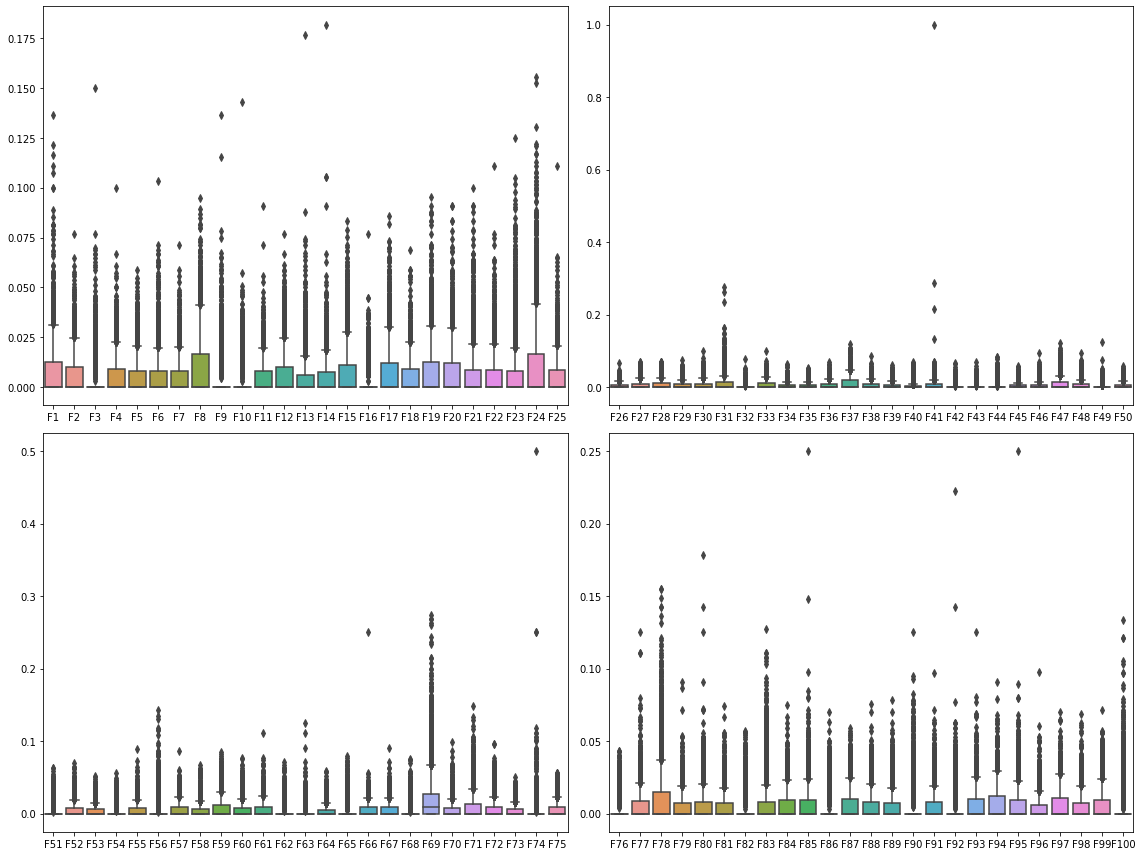

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(data=df3.iloc[:, :25])

plt.subplot(2, 2, 2)
sns.boxplot(data=df3.iloc[:, 25:50])

plt.subplot(2, 2, 3)
sns.boxplot(data=df3.iloc[:, 50:75])

plt.subplot(2, 2, 4)
sns.boxplot(data=df3.iloc[:, 75:100])

plt.tight_layout()
plt.show()

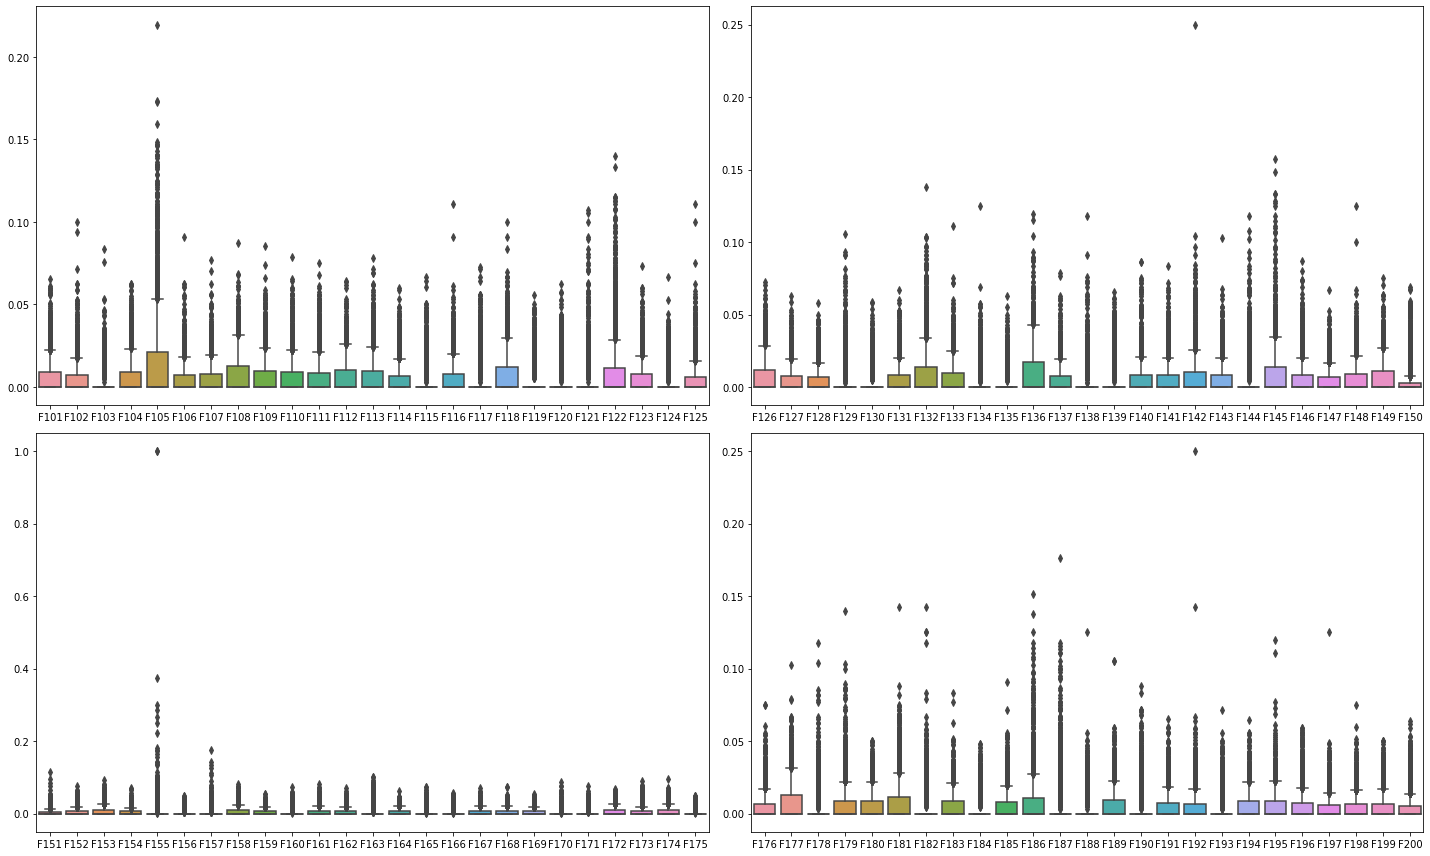

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.boxplot(data=df3.iloc[:, 100:125])

plt.subplot(2, 2, 2)
sns.boxplot(data=df3.iloc[:, 125:150])

plt.subplot(2, 2, 3)
sns.boxplot(data=df3.iloc[:, 150:175])

plt.subplot(2, 2, 4)
sns.boxplot(data=df3.iloc[:, 175:-1])

plt.tight_layout()
plt.show()

Bisa dilihat bahwa setelah nilai outliers ditangani, hanya tersisa beberapa outliers saja dan tidak wajib dihapus untuk mempertahankan variasi data, serta persebarannya sudah menjadi jauh condong ke nilai meannya

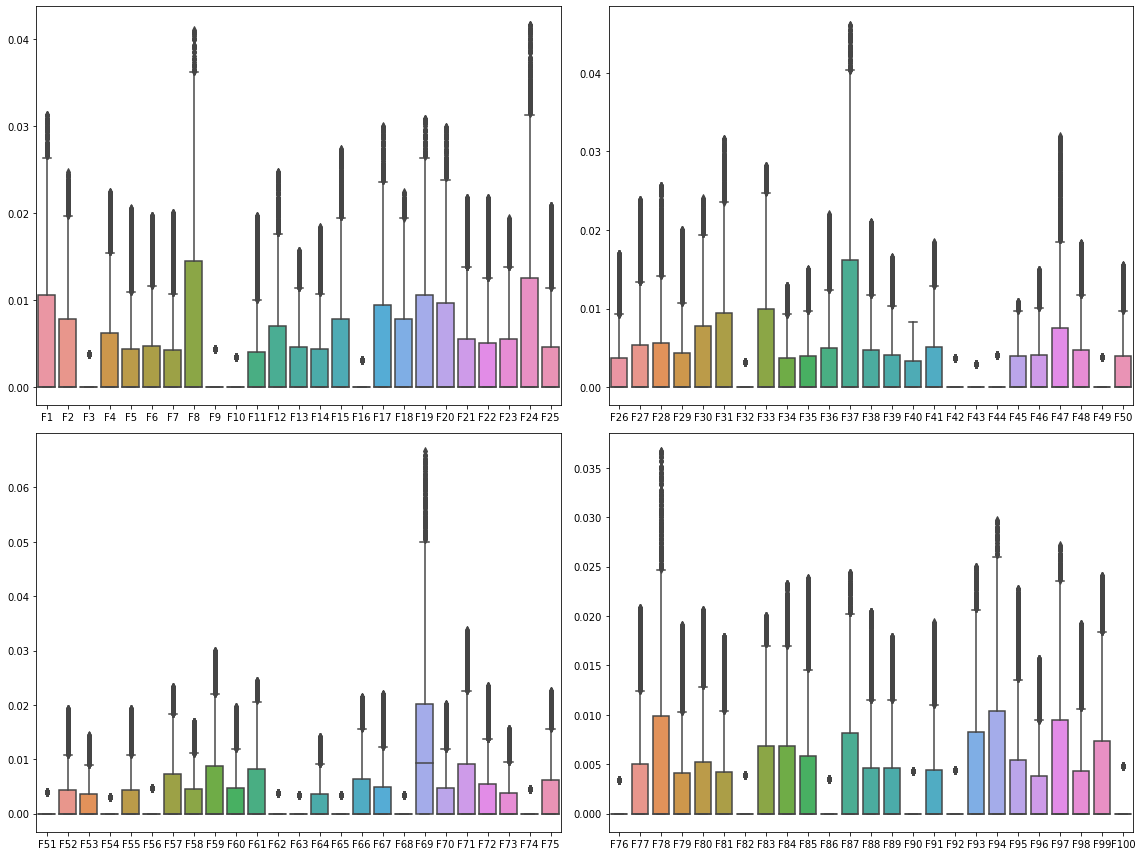

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(data=final_df3.iloc[:, :25])

plt.subplot(2, 2, 2)
sns.boxplot(data=final_df3.iloc[:, 25:50])

plt.subplot(2, 2, 3)
sns.boxplot(data=final_df3.iloc[:, 50:75])

plt.subplot(2, 2, 4)
sns.boxplot(data=final_df3.iloc[:, 75:100])

plt.tight_layout()
plt.show()

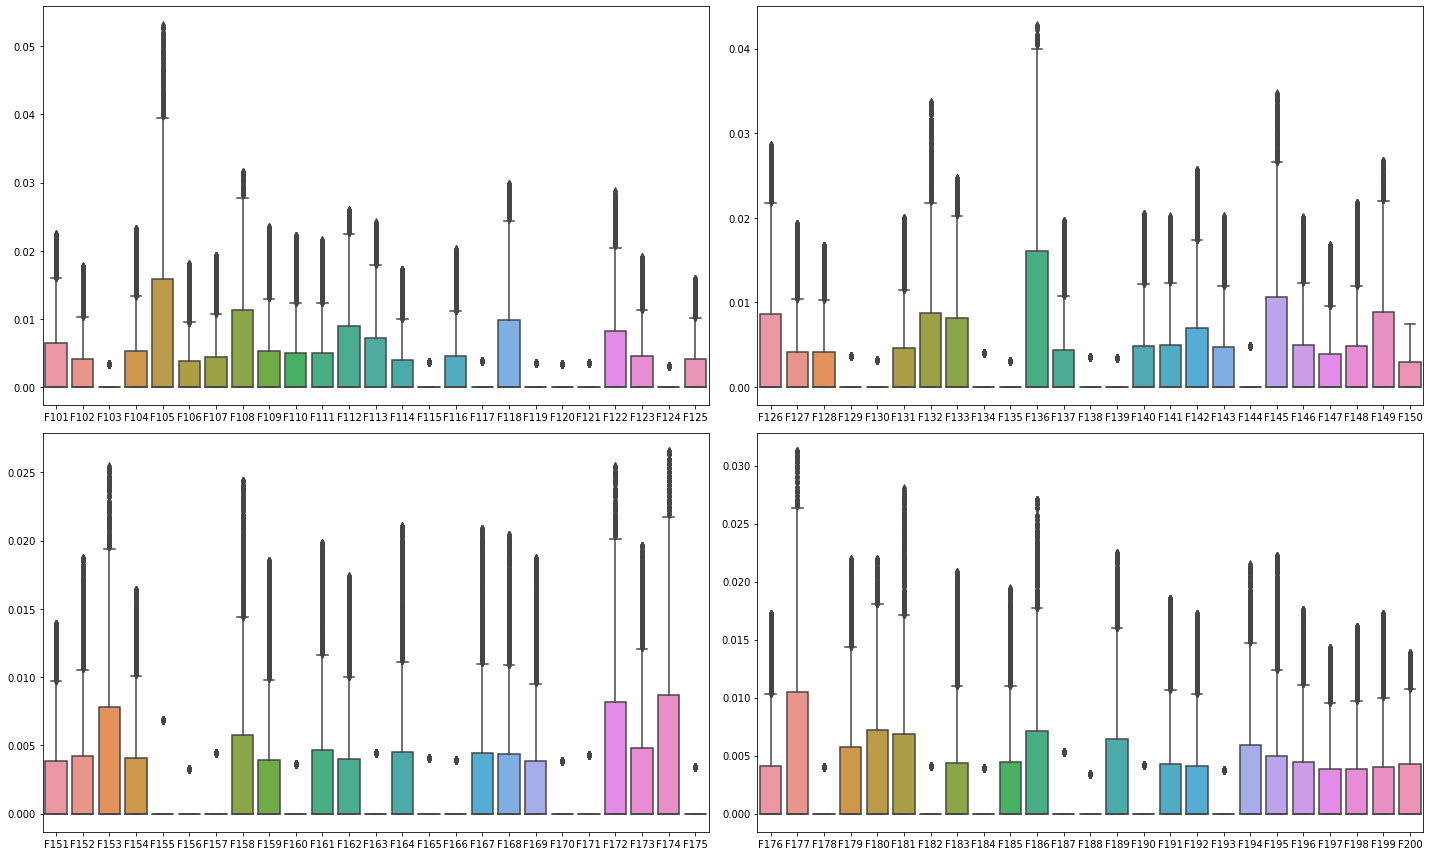

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.boxplot(data=final_df3.iloc[:, 100:125])

plt.subplot(2, 2, 2)
sns.boxplot(data=final_df3.iloc[:, 125:150])

plt.subplot(2, 2, 3)
sns.boxplot(data=final_df3.iloc[:, 150:175])

plt.subplot(2, 2, 4)
sns.boxplot(data=final_df3.iloc[:, 175:-1])

plt.tight_layout()
plt.show()

Dari heatmap 201 kolom (termasuk kolom class) bisa dilihat bahwa warna tersebar secara merata (ungu kehitaman) yang mengindikasikan tidak ada multikolinearitas dan hubungan antara fitur dan label tidak begitu terlihat

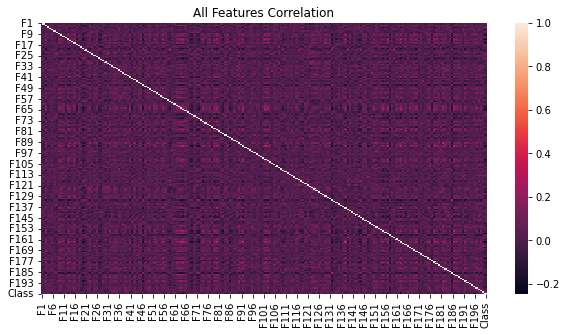

In [ ]:
sns.heatmap(final_df3.corr())

plt.title('All Features Correlation')
plt.show()

Setelah data direduksi, hubungan antara label dan fitur menjadi lebih terlihat. Sayangnya memang korelasinya tidak cukup tinggi (maksimal 0.14), sehingga saya akan menggunakan semua fitur itu untuk membuat model

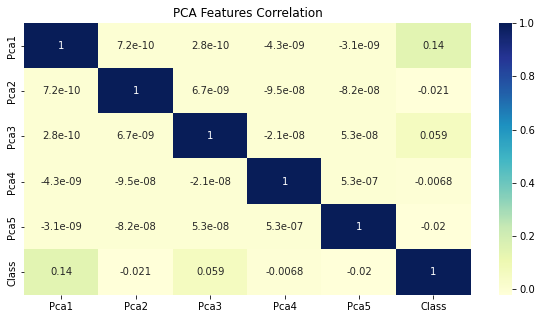

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)

temp = pd.DataFrame(X_pca, columns=['Pca1', 'Pca2', 'Pca3', 'Pca4', 'Pca5'])
temp['Class'] = y

sns.heatmap(temp.corr(), annot=True, cmap='YlGnBu')

plt.title('PCA Features Correlation')
plt.show()

Persebaran data dengan histogram untuk setiap fiturnya adalah normal karena data tersebar di tengah atau bisa dibilang mendekati nilai meannya. Hal ini juga disebabkan karena nilai outliers sudah dihapus sehingga probabilitas densitynya juga normal

label:
* 0 = Pca1
* 1 = Pca2
* 2 = Pca3
* 3 = Pca4
* 4 = Pca5

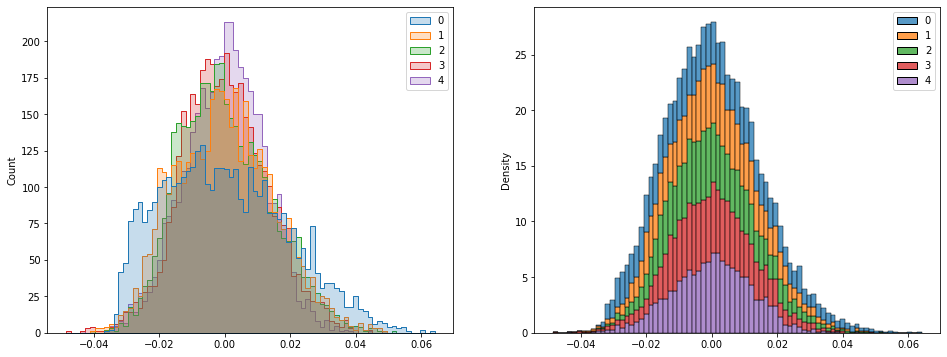

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=X_pca, element="step")

plt.subplot(1, 2, 2)
sns.histplot(data=X_pca, multiple="stack", stat="density")

plt.show()

Kemudian program juga menampilkan persebaran class di setiap fiturnya. Dapat dilihat bahwa tidak terdapat pola yang pasti untuk setiap classnya karena data class tersebar merata di semua nilai. Hal inilah yang membuat korelasinya tidak begitu tinggi

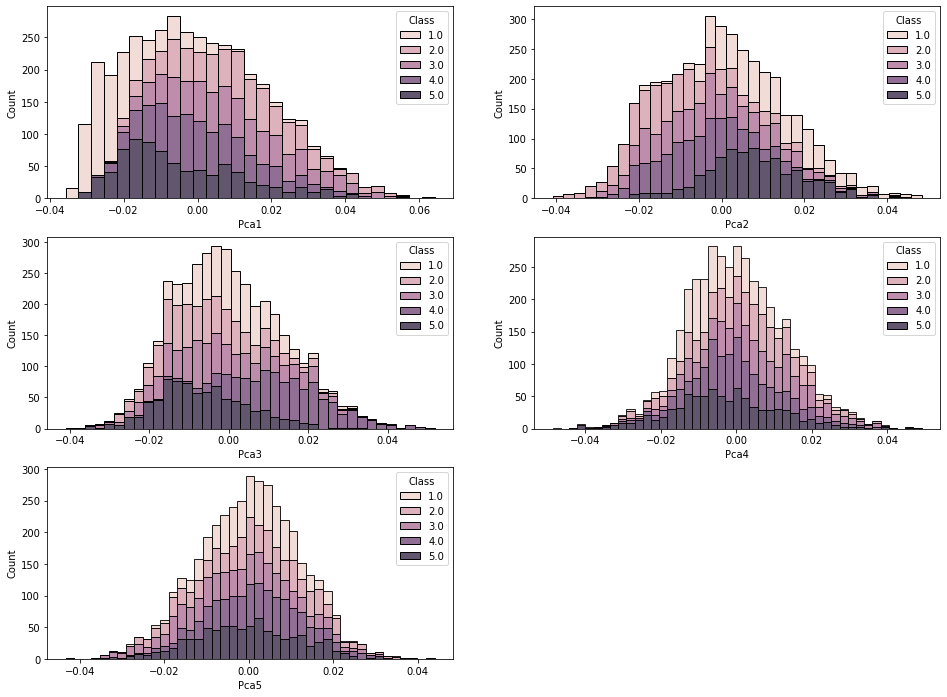

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
sns.histplot(data=temp, x=temp['Pca1'], hue=temp['Class'], multiple="stack")

plt.subplot(3, 2, 2)
sns.histplot(data=temp, x=temp['Pca2'], hue=temp['Class'], multiple="stack")

plt.subplot(3, 2, 3)
sns.histplot(data=temp, x=temp['Pca3'], hue=temp['Class'], multiple="stack")

plt.subplot(3, 2, 4)
sns.histplot(data=temp, x=temp['Pca4'], hue=temp['Class'], multiple="stack")

plt.subplot(3, 2, 5)
sns.histplot(data=temp, x=temp['Pca5'], hue=temp['Class'], multiple="stack")

plt.show()

Bar plot atau count plot dibawah ini mengindikasikan bahwa jumlah data di setiap class sangat rata, sehingga persebarannya kolom labelnya juga normal

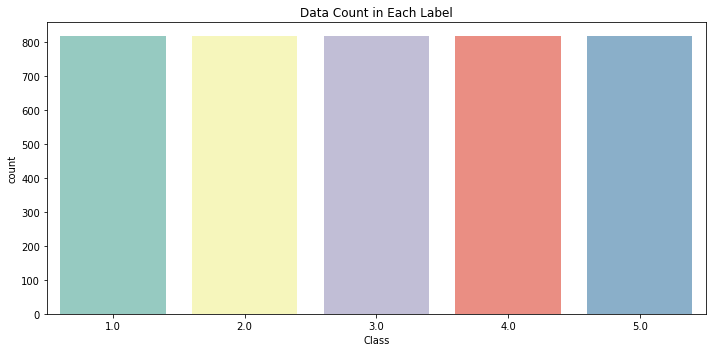

In [ ]:
sns.countplot(data=final_df3, x=final_df3['Class'], palette="Set3")

plt.title('Data Count in Each Label')
plt.tight_layout()
plt.show()

## **3c. Gunakan dua metode machine learning untuk klasifikasi dalam menyelesaikan data di atas. Berikan alasan terhadap metode yang Anda pilih**

Kali ini saya menggunakan 2 metode yang banyak digunakan dalam melakukan supervised machine learning, terutama dalam kasus classification:
1. K-Nearest Neighbor merupakan algoritma klasifikasi yang mencari k tetangga terdekat dari suatu data poin dan melakukan voting terbanyak dari class k tetangga terdekat tersebut. Alasan saya menggunakan algoritma ini karena algoritma KNN dapat bersaing dengan model yang paling akurat untuk membuat prediksi yang akurat. Oleh karena itu, saya menggunakan algoritma ini untuk memperoleh akurasi tinggi tetapi tidak memerlukan model yang dapat dibaca manusia. Kualitas prediksi tergantung pada jarak yang ada pada tiap titik - titik pada fitur.
2. Random Forest adalah algoritma yang cocok dengan sejumlah pengklasifikasi decision tree pada berbagai sub-sampel dari dataset dan menggunakan rata-rata untuk meningkatkan akurasi prediksi dan mengontrol terjadinya over fitting serta mengambil voting terbanyak dari setiap decision tree untuk dijadikan nilai prediksi akhir. Alasan saya menggunakan algoritma ini karena dataset mempunyai data yang sangat banyak sehingga dapat meningkatkan akurasi model ini. Semakin banyak data yang ada maka akurasi model semakin meningkat karena decision tree yang dibuat semakin kompleks pula sehingga voting tree dan prediksi akhir menjadi jauh lebih akurat

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print('KNN model')
print('=========\n')
print('With Dimension Reduction')
print('X train shape: ', end=' ')
print(X_train_pca.shape)
print('X test shape: ', end=' ')
print(X_test_pca.shape)
model = KNeighborsClassifier()
model.fit(X_train_pca, y_train)
y_pred_pca_knn = model.predict(X_test_pca)
print('Accuracy score: ')
print(accuracy_score(y_test, y_pred_pca_knn))


print('\nWithout Dimension Reduction')
print('X train shape: ', end=' ')
print(X_train.shape)
print('X test shape: ', end=' ')
print(X_test.shape)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)
print('Accuracy score: ')
print(accuracy_score(y_test, y_pred_knn))

KNN model

With Dimension Reduction
X train shape:  (3264, 5)
X test shape:  (816, 5)
Accuracy score: 
0.6311274509803921

Without Dimension Reduction
X train shape:  (3264, 200)
X test shape:  (816, 200)
Accuracy score: 
0.7708333333333334


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

print('Random Forest model')
print('===================\n')

print('With Dimension Reduction')
print('X train shape: ', end=' ')
print(X_train_pca.shape)
print('X test shape: ', end=' ')
print(X_test_pca.shape)
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)
y_pred_pca_rf = model.predict(X_test_pca)
print('Accuracy score: ')
print(accuracy_score(y_test, y_pred_pca_rf))


print('\nWithout Dimension Reduction')
print('X train shape: ', end=' ')
print(X_train.shape)
print('X test shape: ', end=' ')
print(X_test.shape)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
print('Accuracy score: ')
print(accuracy_score(y_test, y_pred_rf))

Random Forest model

With Dimension Reduction
X train shape:  (3264, 5)
X test shape:  (816, 5)
Accuracy score: 
0.633578431372549

Without Dimension Reduction
X train shape:  (3264, 200)
X test shape:  (816, 200)
Accuracy score: 
0.8946078431372549


## **3d. Evaluasi dan komparasi hasil yang didapatkan dari dua metode klasifikasi pada poin sebelumnya. Gunakan metric yang sesuai, dan jelaskan hasil yang Anda dapatkan**

**Semakin tinggi nilai accuracy, precision, recall, f1-score maka model semakin baik.**

Dari hasil yang didapat melalui classification report dapat dilihat dengan jelas bahwa semakin banyak fitur yang digunakan maka semakin baik pula akurasi modelnya. Hal ini dikarenakan dataset yang ada sudah sangat berkualitas dari awal, hanya perlu menangani outlier saja. Bisa dilihat pada poin - poin sebelumnya bahwa:
1. Tidak ada multikolinearitas pada fitur dataset
2. Tidak ada duplikat value pada fitur dataset
3. Tidak perlu dinormalisasi
4. Persebaran data sudah sangat merata (normal) setelah ditangani nilai outliersnya

Jadi kesimpulan yang saya dapatkan dari evaluasi metrik ini adalah, semakin banyak fiturnya semakin baik akurasi modelnya tetapi semakin lama waktu runtimenya. Sebaliknya, semakin sedikit fitur yang dipakai, maka akurasi modelnya semakin menurun tetapi semakin cepat waktu runtimenya. 

Dengan demikian, manakah model yang lebih baik? semua tergantung kebutuhan. Jika akurasi adalah prioritas maka gunakan banyak fitur, tetapi jika runtime adalah prioritas maka gunakan lebih sedikit fitur dengan memerhatikan tingkat akurasinya.

Dari segi model dapat dilihat dengan jelas bahwa model Random Forest menghasilkan akurasi yang jauh lebih tinggi daripada KNN jikam menggunakan fitur yang lebih banyak. Sedangkan jika menggunakan dataset yang sudah direduksi, hanya terpaut 1% saja

In [ ]:
from sklearn.metrics import classification_report

print('KNN dengan fitur reduksi dimensi:')
print(classification_report(y_test, y_pred_pca_knn, target_names=['1', '2', '3', '4', '5']))
print()

print('KNN tanpa fitur reduksi dimensi:')
print(classification_report(y_test, y_pred_knn, target_names=['1', '2', '3', '4', '5']))
print()

print('Random Forest dengan fitur reduksi dimensi:')
print(classification_report(y_test, y_pred_pca_rf, target_names=['1', '2', '3', '4', '5']))
print()

print('Random Forest tanpa fitur reduksi dimensi:')
print(classification_report(y_test, y_pred_rf, target_names=['1', '2', '3', '4', '5']))

KNN dengan fitur reduksi dimensi:
              precision    recall  f1-score   support

           1       0.78      0.82      0.80       182
           2       0.55      0.58      0.57       163
           3       0.41      0.47      0.44       146
           4       0.71      0.69      0.70       153
           5       0.69      0.56      0.62       172

    accuracy                           0.63       816
   macro avg       0.63      0.62      0.63       816
weighted avg       0.64      0.63      0.63       816


KNN tanpa fitur reduksi dimensi:
              precision    recall  f1-score   support

           1       0.89      0.91      0.90       182
           2       0.54      0.94      0.68       163
           3       0.85      0.64      0.73       146
           4       0.95      0.65      0.78       153
           5       0.89      0.67      0.77       172

    accuracy                           0.77       816
   macro avg       0.83      0.76      0.77       816
weighted 

In [ ]:
!jupyter nbconvert --to html /content/2440078411_AlvonDaniloSukardi_LB01_UAS.ipynb

[NbConvertApp] Converting notebook /content/2440078411_AlvonDaniloSukardi_LB01_UAS.ipynb to html
[NbConvertApp] Writing 1498943 bytes to /content/2440078411_AlvonDaniloSukardi_LB01_UAS.html
